In [1]:
import numpy as np 
import pandas as pd 
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns

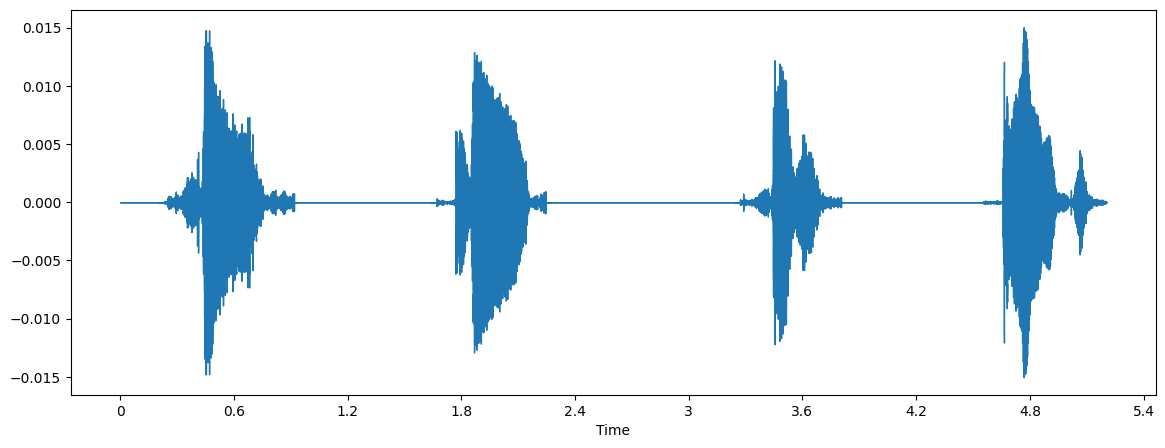

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
audio_path = r'C:\Users\Admin\Downloads\МН\ML.wav'
y, sr = librosa.load(audio_path)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.show()



In [3]:
import numpy as np
import librosa
import soundfile as sf

def split_audio_on_silence(audio, sr, threshold=0.01, min_sound_length=0.2, padding=0.4):
    segments = []
    silence_start = None
    sound_start = None
    min_sound_samples = int(min_sound_length * sr)
    padding_samples = int(padding * sr)
    f=int(padding_samples/4)
    for i in range(len(audio)):
        if abs(audio[i]) < threshold:
            if sound_start is not None and i - sound_start >= min_sound_samples:
                start_segment = max(0, sound_start - padding_samples)
                end_segment = min(len(audio), i+f)
                segments.append(audio[start_segment:end_segment])
                sound_start = None
            if silence_start is None:
                silence_start = i
        else:
            if silence_start is not None:
                sound_start = i
                silence_start = None
    
    return segments

# Завантаження аудіофайлу
audio_path = r'C:\Users\Admin\Downloads\МН\ML.wav'
audio, sr = librosa.load(audio_path, sr=None)

# Виклик функції для розділення аудіо
segments = split_audio_on_silence(audio, sr)
segment_paths =[]
# Збереження частин аудіо у файли
for i, segment in enumerate(segments):
    output_path = f'segment_{i+1}.wav'
    sf.write(output_path, segment, sr)
    segment_paths.append (output_path)
print(f'Segment count: {len(segments)}')


Segment count: 4


In [5]:
import joblib

# Завантаження моделі
model = joblib.load(r'C:\Users\Admin\Downloads\МН\model.joblib')
scaler = joblib.load(r'C:\Users\Admin\Downloads\МН\scaler.joblib')


In [6]:
# Передбачення для кожної частини аудіо
predictions = []
for segment in segment_paths:
    y, sr = librosa.load(segment)
# Обчислення MFCC
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    mfccs_mean = np.mean(mfccs, axis=1)
    mm=mfccs_mean.reshape(1,-1)
    scaled_feature = scaler.transform(mm)
    prediction = model.predict(scaled_feature)
    predictions.append(prediction)

print(predictions)

[array([5]), array([2]), array([7]), array([8])]


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


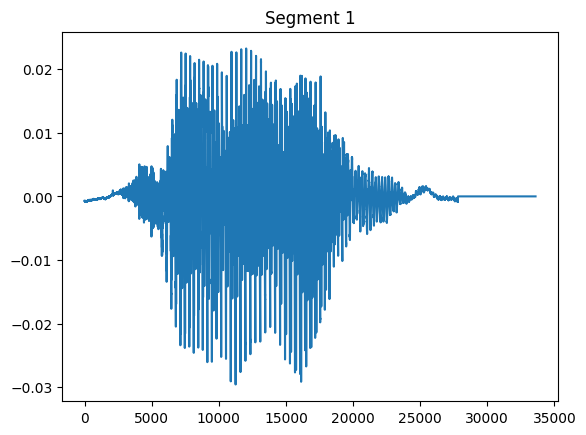

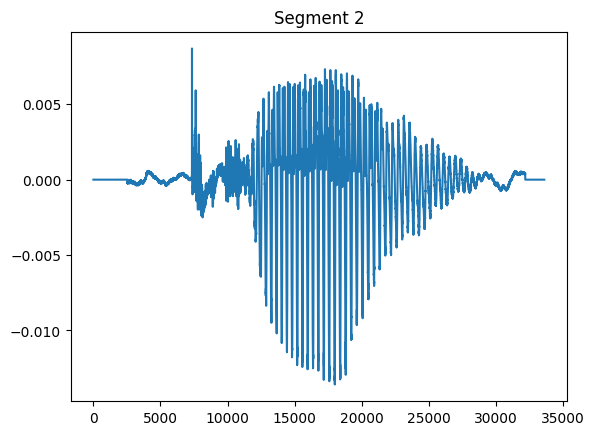

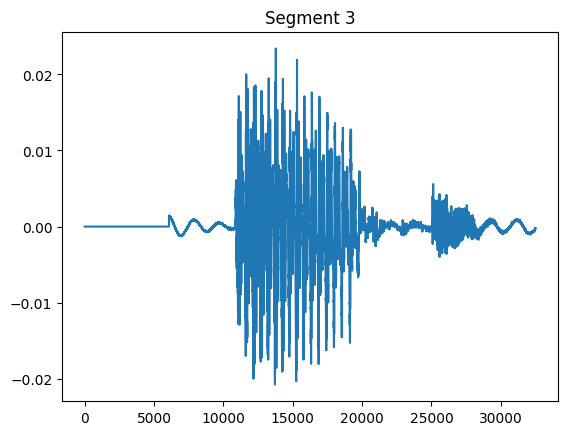

In [242]:
import matplotlib.pyplot as plt

for i, segment in enumerate(segments):
    plt.figure()
    plt.plot(segment)
    plt.title(f'Segment {i+1}')
    plt.show()